#   **15 October 2025**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as spi
from scipy import optimize, fft

In [3]:
rng = np.random.default_rng()

**TODO**
- [x] Generate a ***random*** set of `x` and `f(x)`
- [x] Take a random sample from `x` and `f(x)` defined as $x_{samp}$ and $f(x_{samp})$
- [x] Run these interpolators to $x_{samp}$ and $f(x_{samp})$
    - [x] Barycentric
    - [ ] Cubic Spline
- [x] Compare the interpolated functions to the true function $f(x)$

The Dow Jones dataset is given to us for sampling. 
    - [ ] Generate 4 plots comparing the interpolated and original dataset for different levels of sampling.
    - [ ] Explain how the difference between the interpolators reflect in your results.

###  **Sir Chester's Example**

In [16]:
#   Generate a set of x and f(x)
N_res = 100
N_samp = int(0.5*N_res)

x_samp = rng.uniform(low=0, high=4*np.pi, size=N_samp)
y_samp = np.sin(x_samp)

In [19]:
min_x, max_x = min(x_samp), max(x_samp)
approx_x = np.linspace(min_x, max_x, 10*N_samp)

interp_func_linear = spi.interp1d(x_samp, y_samp, kind='linear')
approx_y = interp_func_linear(approx_x)

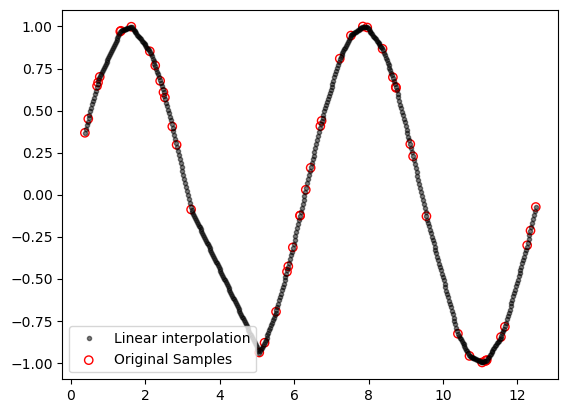

In [21]:
fig, ax = plt.subplots()
ax.plot(approx_x, approx_y, 'k.', label='Linear interpolation', alpha=0.5)
ax.scatter(x_samp, y_samp, facecolors='none', edgecolors='red', label='Original Samples')
ax.legend()

In [27]:
N_samp = 20
x_samp = rng.uniform(low=0, high=4*np.pi, size=N_samp)
y_samp = np.sin(x_samp)
approx_x = np.linspace(min_x, max_x, 10*N_samp)

intrp_methods = ['linear', 'nearest', 'quadratic', 'cubic']

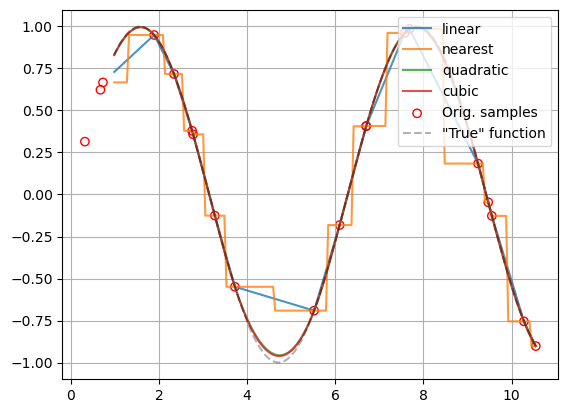

In [29]:
fig2, ax = plt.subplots()
for i in intrp_methods:
    interp_func = spi.interp1d(x_samp, y_samp, kind=i)
    approx_x = np.linspace(max(x_samp), max(y_samp), 10*N_samp)
    approx_y = interp_func(approx_x)
    ax.plot(approx_x, approx_y, label=i, alpha=0.8)

ax.scatter(x_samp, y_samp, facecolors='none', edgecolor='red', label="Orig. samples")
ax.plot(approx_x, np.sin(approx_x), "k--", alpha=0.3, label='"True" function')
ax.grid(True)
ax.legend(loc=1)

##  **Applying `spi.BarycentricInterpolator`**

###  Example from barycentric_interpolate() documentation

In [42]:
x_observed = np.linspace(0.0, 10.0, 11)
y_observed = np.sin(x_observed)

x = np.linspace(min(x_observed), max(x_observed), num=100)
y = spi.barycentric_interpolate(x_observed, y_observed, x)

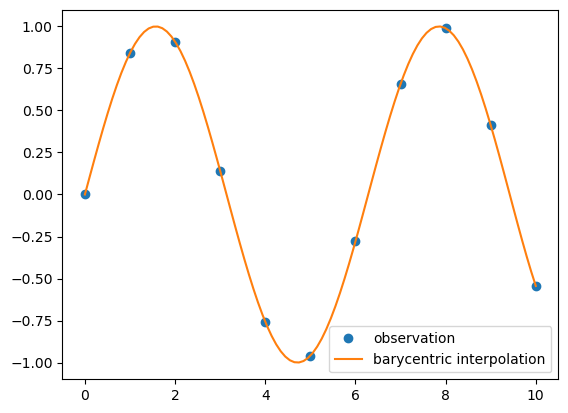

In [43]:
plt.plot(x_observed, y_observed, "o", label="observation")
plt.plot(x, y, label="barycentric interpolation")
plt.legend()
plt.show()

### Example from .BarycentricInterpolator() documentation

In [45]:
xi = rng.random(6) * np.pi/2
f, f_d1, f_d2, f_d3, f_d4 = np.sin, np.cos, lambda x: -np.sin(x), lambda x: -np.cos(x), np.sin
P = spi.BarycentricInterpolator(xi, f(xi), random_state=rng)

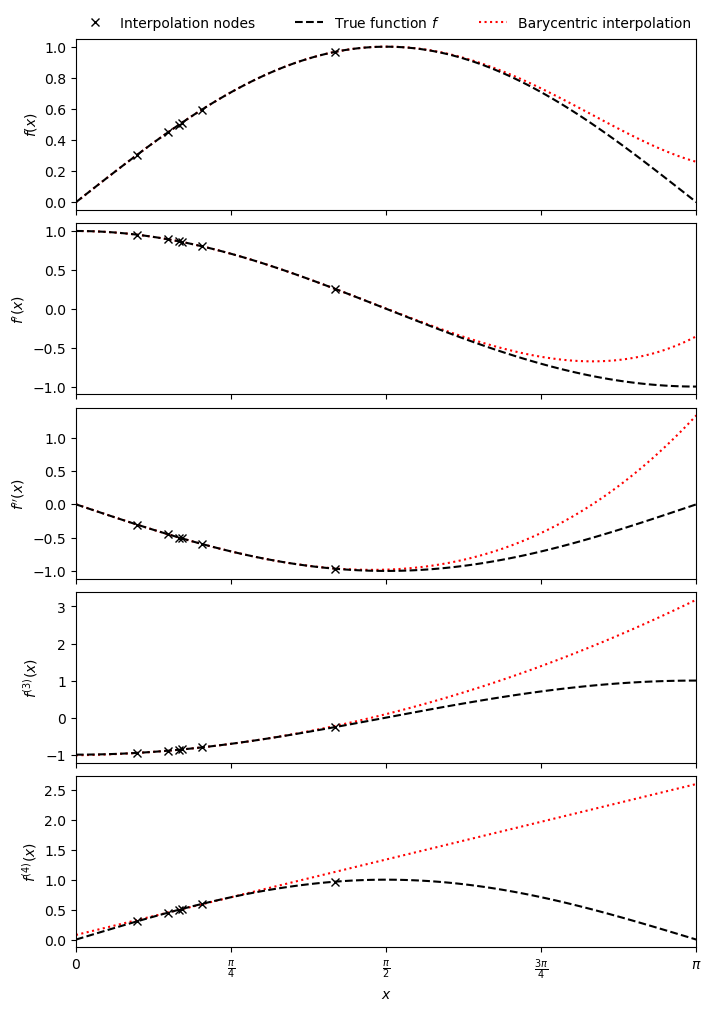

In [46]:
fig, axs = plt.subplots(5, 1, sharex=True, layout='constrained', figsize=(7,10))
x = np.linspace(0, np.pi, 100)

axs[0].plot(x, P(x), 'r:', x, f(x), 'k--', xi, f(xi), 'xk')
axs[1].plot(x, P.derivative(x), 'r:', x, f_d1(x), 'k--', xi, f_d1(xi), 'xk')
axs[2].plot(x, P.derivative(x, 2), 'r:', x, f_d2(x), 'k--', xi, f_d2(xi), 'xk')
axs[3].plot(x, P.derivative(x, 3), 'r:', x, f_d3(x), 'k--', xi, f_d3(xi), 'xk')
axs[4].plot(x, P.derivative(x, 4), 'r:', x, f_d4(x), 'k--', xi, f_d4(xi), 'xk')

axs[0].set_xlim(0, np.pi)
axs[4].set_xlabel(r"$x$")
axs[4].set_xticks([i * np.pi / 4 for i in range(5)],
                  ["0", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"])

#   Labelling and displaying the legend
for ax, label in zip(axs, ("$f(x)$", "$f'(x)$", "$f''(x)$", "$f^{(3)}(x)$", "$f^{(4)}(x)$")):
    ax.set_ylabel(label)
labels = ['Interpolation nodes', 'True function $f$', 'Barycentric interpolation']
axs[0].legend(axs[0].get_lines()[::-1], labels, bbox_to_anchor=(0., 1.02, 1., .102),
              loc='lower left', ncols=3, mode="expand", borderaxespad=0., frameon=False)
plt.show()

###   Using it with a function

Let's attempt to interpolate points of $$f(x) = e^{-x^2}$$

In [231]:
N_samp = 100
x_samp = rng.uniform(low=-10, high=10, size=N_samp)
y_samp = np.exp(-x_samp**2)

min_x, max_x = min(x_samp), max(x_samp)
approx_x = np.linspace(min_x, max_x, N_samp)

gauss_BI = spi.BarycentricInterpolator(x_samp, y_samp, random_state=rng)
approx_y = gauss_BI(approx_x)

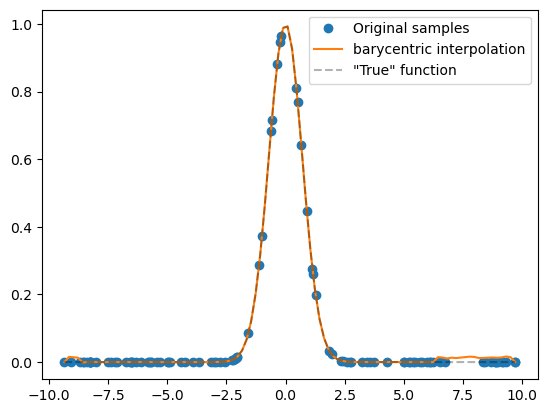

In [232]:
fig, ax = plt.subplots()
ax.plot(x_samp, y_samp, "o", label="Original samples")
ax.plot(approx_x, approx_y, label="barycentric interpolation")
ax.plot(approx_x, np.exp(-(approx_x**2)), "k--", alpha=0.3, label='"True" function')

plt.legend()
plt.show()

## **Applying `spi.CubicSpline`**

In [116]:
bc_type = np.array(['not-a-knot', 'periodic', 'clamped', 'natural'])

###   Examples from its documentation

In [ ]:
x = np.arange(10)
y = np.sin(x)

cs = spi.CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)

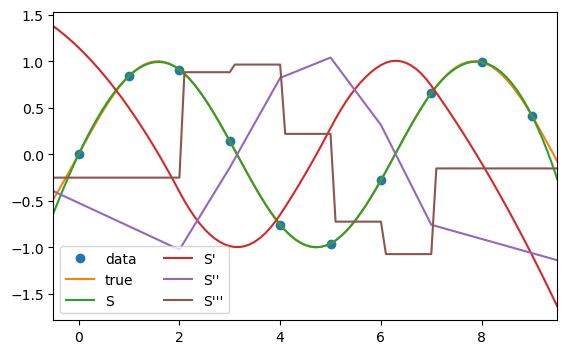

In [112]:
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, np.sin(xs), label='true')
ax.plot(xs, cs(xs), label="S")
ax.plot(xs, cs(xs, 1), label="S'")
ax.plot(xs, cs(xs, 2), label="S''")
ax.plot(xs, cs(xs, 3), label="S'''")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()

In [113]:
theta = 2 * np.pi * np.linspace(0, 1, 5)
y = np.c_[np.cos(theta), np.sin(theta)]

cs = spi.CubicSpline(theta, y, bc_type='periodic')
print("ds/dx={:.1f} ds/dy={:.1f}".format(cs(0, 1)[0], cs(0, 1)[1]))
xs = 2 * np.pi * np.linspace(0, 1, 100)

ds/dx=0.0 ds/dy=1.0


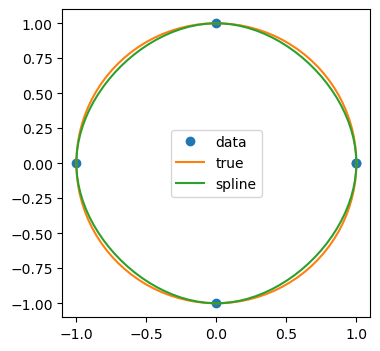

In [114]:
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(y[:, 0], y[:, 1], 'o', label='data')
ax.plot(np.cos(xs), np.sin(xs), label='true')
ax.plot(cs(xs)[:, 0], cs(xs)[:, 1], label='spline')
ax.axes.set_aspect('equal')
ax.legend(loc='center')
plt.show()

In [115]:
cs = spi.CubicSpline([0, 1], [0, 1], bc_type=((1, 0), (1, 3)))
x = np.linspace(0, 1)
np.allclose(x**3, cs(x))

True

### Using it with a function

Again, let's try the basic Gaussian function $$f(x)=e^{-x^2}$$

In [131]:
N_samp = 100
x_samp = rng.uniform(low=-10, high=10, size=N_samp)
x_samp_inc = np.sort(x_samp)
y_samp = np.exp(-x_samp**2)

gauss_CS = spi.CubicSpline(x_samp_inc, y_samp, bc_type=bc_type[0])
x_approx = np.linspace(min(x_samp), max(x_samp), N_samp)
y_approx = gauss_CS(x_approx)

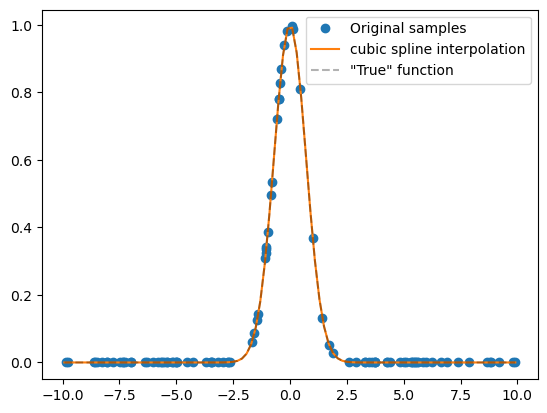

In [132]:
fig, ax = plt.subplots()
ax.plot(x_samp, y_samp, "o", label="Original samples")
ax.plot(approx_x, approx_y, label="cubic spline interpolation")
ax.plot(approx_x, np.exp(-(approx_x**2)), "k--", alpha=0.3, label='"True" function')

plt.legend()
plt.show()

## **Dow Jones Index**

In [151]:
#   Sir Chester's codeblock (modified by me)
dow_data = np.loadtxt("./week9/dow.txt")
N_size = len(dow_data)
#print(len(dow_data))

#   Choosing how much points (or how much in percent, we'll get to it later) are to be sampled.
num_points = 10
idx_choice  = rng.choice(range(len(dow_data)), size = num_points, replace=False)
subsample   = dow_data[idx_choice]

In [ ]:
x_true = np.array([i for i in range(N_size)], dtype=int)
#   Note that y_true would be dow_data.

#   The idea is to automate the interpolation in each 10-percent interval of the total amount of points in our data.
N_samp_size = np.array([i*N_size*1E-1 for i in range(11)], dtype=int)

idx_choice = []
for i in range(len(N_samp_size)):
    #idx_choice = rng.choice(x, size=N_samp_size[i], replace=False)
    idx_choice.append(rng.choice(range(N_size), size=N_samp_size[i], replace=False))

for i in 

[array([], dtype=int64),
 array([ 412,  109,  404,  317,  547,  153,  845,  788,  724,  553,  577,
        1015,  813,  591,  654,  155,  160,  949,  405,  712,  256, 1021,
         672,  833,  645,   93,  704,  922, 1013,  755,  133,  440,  193,
          35,  709,  105,  447,  337,  938,  794,   46,  609,  641,  700,
         230,   42,  285,  308,  798,  382,  586, 1016,  797,  522,  667,
         536,  597,  407,  538,  605,  661,  257,  924,  571,  713,  765,
         433,  445,  146,  136,  385,  759,  143,  190,  876,  294,  449,
         131,  647,  344,  481,   92,  227,  721,  312,  946,  685,  559,
         732,  807, 1011,  215,  365,  879,  339,  307,  761,  785,  720,
         851,  736,  356]),
 array([ 297,   82,  841,  365,  494,  714,    5,  766,  181,  501,  235,
         772,  649,  143,  228,  648,  552,  127, 1015,  258,  844,  740,
         507,  117,  608,  469,  443,  770,  319,  971,  345,   79,  518,
         349,  729,  465,  639,  817,  920,  227,   99,  51

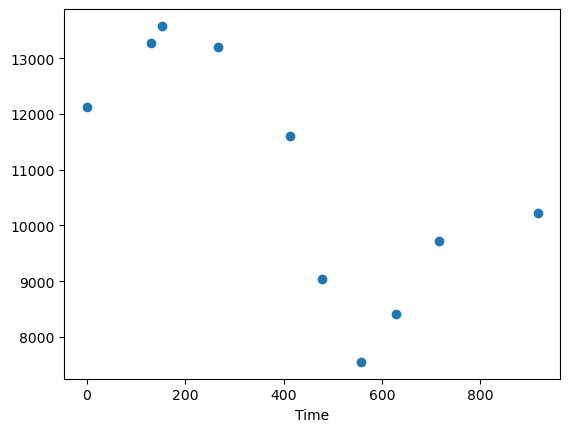

In [101]:
#   True shape of data, and also plotting the randomly sampled points.
#plt.plot(dow_data, color="red")
plt.xlabel("Time")
plt.scatter(idx_choice, subsample)
plt.show()

### **References and links**

[[1]](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html#tutorial-interpolate) `scipy.interpolate` User Guide.  
[[2]](https://docs.scipy.org/doc/scipy/reference/interpolate.html) `scipy.interpolate` Documentation.  
[[3]](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BarycentricInterpolator.html) Barycentric Interpolation in `scipy`.  
[[4]](./References/s0036144502417715.pdf) Barycentric Lagrange Interpolation.  
[[5]](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html) Cubic spline interpolation in `scipy`.  
[[6]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice) `rng.choice()`.